# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [75]:
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randrange
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

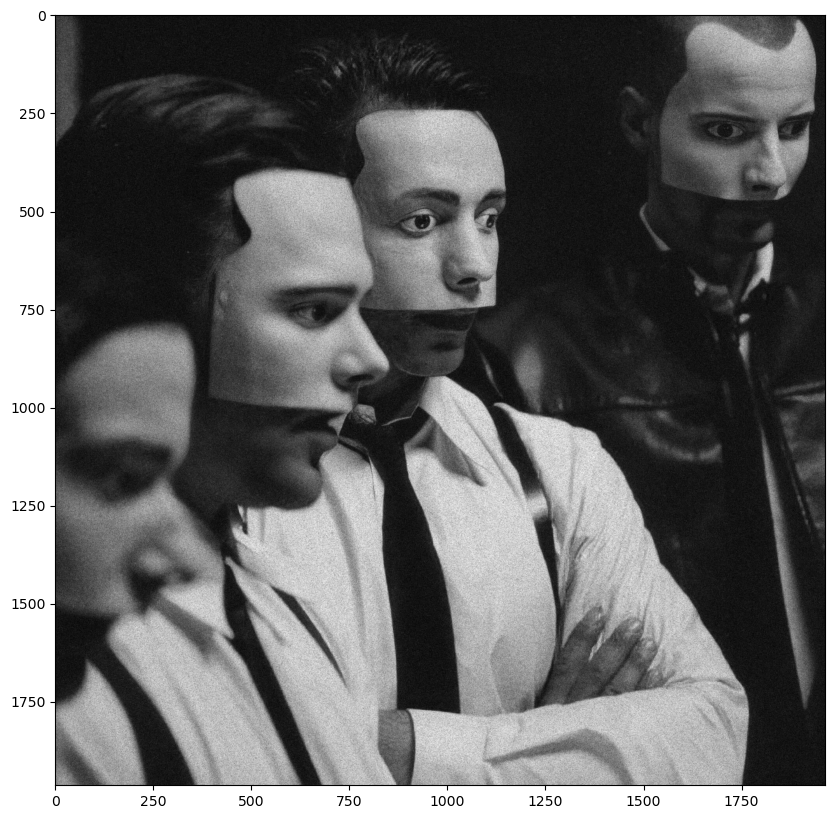

In [76]:
img = cv2.imread('data/rammstein_mask.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [77]:
predictor = dlib.shape_predictor('../../shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [78]:
# Convert landmarks to ndarray for better manipulation
def landmarks(shape):
    kps = list(map(lambda p: (p.x, p.y), shape.parts()))
    return np.array(kps)

In [79]:
# detected faces on the image
# The 1 in the second argument indicates that we should upsample the image 1 time
detectedFaces = detector(img, 1)
landmarkList = []
for k, d in enumerate(detectedFaces):
    print("Face {}: Left: {} Top: {} Right: {} Bottom: {}".format(k+1, d.left(), d.top(), d.right(), d.bottom()))
    
    shape = predictor(img, d)
    landmarkList.append(landmarks(shape))

Face 1: Left: 1529 Top: 143 Right: 1991 Bottom: 605
Face 2: Left: 810 Top: 348 Right: 1272 Bottom: 811


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

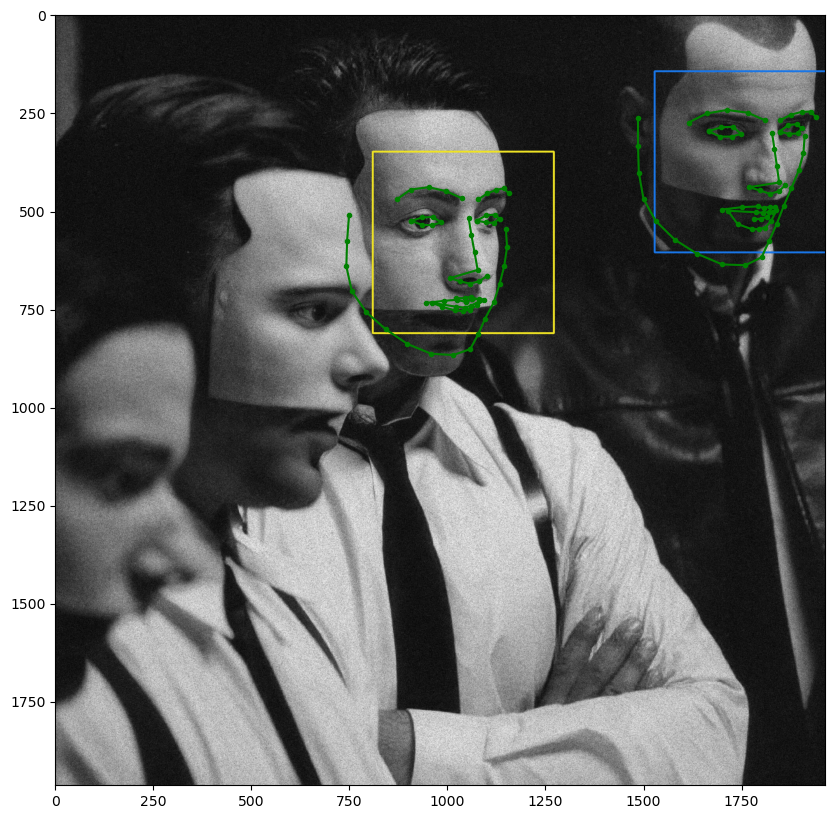

In [80]:
def plot_landmarks(vec):
    plt.plot(vec[0:17,0], vec[0:17,1], 'g.-')       # Contour
    plt.plot(vec[48:68,0], vec[48:68,1], 'g.-')     # Mouth
    plt.plot(vec[17:22,0], vec[17:22,1], 'g.-')     # Right eyebrow
    plt.plot(vec[22:27,0], vec[22:27,1], 'g.-')     # Left eyebrow
    plt.plot(np.concatenate((vec[36:42,0], vec[36:37,0])), np.concatenate((vec[36:42,1], vec[36:37,1])), 'g.-')     # Left eye
    plt.plot(np.concatenate((vec[42:48,0], vec[42:43,0])), np.concatenate((vec[42:48,1], vec[42:43,1])), 'g.-')     # Right eye
    plt.plot(vec[27:36,0], vec[27:36,1], 'g.-')     # Nose    
    
for face in detectedFaces:
    color = (randrange(255), randrange(255), randrange(255))
    cv2.rectangle(img, (face.left(), face.top()), (face.right(), face.bottom()), color, 3)    
    
plt.imshow(img)

for k, landmark in enumerate(landmarkList):
    plot_landmarks(landmark)



### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

According to my observation used algorithm can identify a full face or turned face less than 45 degree to observer.
Algorithm can not handle with face profile or looking at bottom face. But sunglasses does not impact to recognition and mask as well.
This algorithm is not robust because can identify faces in constrained face position